# Iowa Liquor Market Research for New Store Locations

Scenario involves a liquor store owner in Iowa is looking to expand to new locations and has hired you to investigate the market data for potential new locations. The business owner is interested in the details of the best model that fits the data, so that his team can evaluate potential locations for a new storefront.

The data is from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy),which is in csv format. The data is 10% sample of the total data.

## The following steps are taken in this analysis

* Importing and loading libraries

* Tidying the Data/Data Munging

* Exploratory Data Analysis & Visualization

* Regression Analysis


## Importing Dataset and Data Munging

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Load the data into a DataFrame
df = pd.read_csv('../Resources/Iowa_Liquor_sales_sample_10pct.csv')

### Filling in missing values in County Names as well as misspelled city names

In [31]:
#fixing missing county names
cc = df.set_index('City')['County'].to_frame()
cc.dropna(inplace=True)
undefined = pd.DataFrame([['Wayne'],['Polk'],['Fremont']], columns=['County'], index=['SEYMOUR', 'RUNNELLS', 'TABOR'])
df2 = pd.concat([cc, undefined])

def get_county(city):
    return df2.T[city].values[0][0]


In [32]:
citys_wo_county = df[pd.isnull(df["County"])]["City"].to_frame()
for row in citys_wo_county.index:
    df.set_value(row, 'County', get_county(citys_wo_county.ix[row]['City']))

In [33]:
#fixing spelling errors
df['City'] = df['City'].apply(lambda x: x.replace('MOUNT PLEASANT','MT PLEASANT'))
df['City'] = df['City'].apply(lambda x: x.replace('OTTUWMA','OTTUMWA'))
df['City'] = df['City'].apply(lambda x: x.replace('MOUNT VERNON','MT VERNON'))
df['City'] = df['City'].apply(lambda x: x.replace('ARNOLDS PARK','ARNOLD\'S PARK'))
df['City'] = df['City'].apply(lambda x: x.replace('LEMARS','LE MARS'))
df['City'] = df['City'].apply(lambda x: x.replace('LECLAIRE','LE CLAIRE'))
df['City'] = df['City'].apply(lambda x: x.replace('DEWITT','DE WITT'))
df['City'] = df['City'].apply(lambda x: x.replace('GUTTENBURG','GUTTENBERG'))
df['City'] = df['City'].apply(lambda x: x.replace('JEWELL','JEWELL JUNCTION'))
df['City'] = df['City'].apply(lambda x: x.replace('JEWELL JUNCTION JUNCTION','JEWELL JUNCTION'))
df['City'] = df['City'].apply(lambda x: x.replace('KELLOG','KELLOGG'))
df['City'] = df['City'].apply(lambda x: x.replace('KELLOGGG','KELLOGG'))


In [34]:
#There were some values in the County field that did not parse correct. This will fix the issues
df[(df['County']=='W') | (df['County']=='P') | (df['County']=='F')]

Date  Store Number      City Zip Code  County Number County  \
46599   03/15/2016          5223     TABOR    51653            NaN      F   
50149   03/30/2016          5217   SEYMOUR    52590            NaN      W   
89794   01/13/2016          5217   SEYMOUR    52590            NaN      W   
120722  01/13/2016          5217   SEYMOUR    52590            NaN      W   
131595  01/13/2016          5217   SEYMOUR    52590            NaN      W   
140719  03/15/2016          5223     TABOR    51653            NaN      F   
156543  03/09/2016          5216  RUNNELLS    50237            NaN      P   
168748  03/02/2016          5217   SEYMOUR    52590            NaN      W   
202083  03/15/2016          5223     TABOR    51653            NaN      F   
213206  03/09/2016          5216  RUNNELLS    50237            NaN      P   
234840  03/09/2016          5216  RUNNELLS    50237            NaN      P   
259771  02/10/2016          5217   SEYMOUR    52590            NaN      W   

         Category                       Category Name  Vendor Number  \
46599   1082900.0  MISC. IMPORTED CORDIALS & LIQUEURS            192   
50149   1012100.0                   CANADIAN WHISKIES             65   
89794   1031080.0                      VODKA 80 PROOF            300   
120722  1042100.0                   IMPORTED DRY GINS            260   
131595  1011300.0                  TENNESSEE WHISKIES             85   
140719  1011500.0               STRAIGHT RYE WHISKIES            255   
156543  1081300.0                 PEPPERMINT SCHNAPPS            434   
168748  1081390.0                   IMPORTED SCHNAPPS            421   
202083  1012100.0                   CANADIAN WHISKIES            260   
213206  1011100.0                    BLENDED WHISKIES            260   
234840  1012100.0                   CANADIAN WHISKIES            115   
259771  1081312.0               BUTTERSCOTCH SCHNAPPS             65   

        Item Number                    Item Description  Bottle Volume (ml)  \
46599         65254                Jagermeister Liqueur                 375   
50149         10625            Canadian Club Whisky Pet                 750   
89794         36904                 Mccormick Vodka Pet                 375   
120722        28865                       Tanqueray Gin                 375   
131595        26820  Jack Daniels Old #7 Black Lbl Flat                 375   
140719        27102                       Templeton Rye                 750   
156543        81206       Paramount Peppermint Schnapps                 750   
168748        69636  Dr. Mcgillicuddy's Cherry Schnapps                 750   
202083        11296                         Crown Royal                 750   
213206        25604         Seagrams 7 Crown Bl Whiskey                 375   
234840        11776                        Black Velvet                 750   
259771        82786       Dekuyper Buttershots Schnapps                 750   

       State Bottle Cost State Bottle Retail  Bottles Sold Sale (Dollars)  \
46599              $6.52               $9.78             3         $29.34   
50149              $7.88              $11.82             3         $35.46   
89794              $1.80               $2.70            12         $32.40   
120722             $6.99              $10.49             6         $62.94   
131595             $7.00              $10.50            12        $126.00   
140719            $18.09              $27.14             6        $162.84   
156543             $3.75               $5.63             6         $33.78   
168748             $8.67              $13.01            12        $156.12   
202083            $15.00              $22.50             6        $135.00   
213206             $3.50               $5.25             6         $31.50   
234840             $5.23               $7.85            12         $94.20   
259771             $6.30               $9.45             6         $56.70   

        Volume Sold (Liters)  Volume Sold (Ga

In [35]:
#setting individual values to correct County
df.ix[46599,'County'] = 'Fremont'
df.ix[50149,'County'] = 'Wayne'
df.ix[89794,'County'] = 'Wayne'
df.ix[120722,'County'] = 'Wayne'
df.ix[131595,'County'] = 'Wayne'
df.ix[140719,'County'] = 'Fremont'
df.ix[156543,'County'] = 'Polk'
df.ix[168748,'County'] = 'Wayne'
df.ix[202083,'County'] = 'Fremont'
df.ix[213206,'County'] = 'Fremont'
df.ix[234840,'County'] = 'Polk'
df.ix[259771,'County'] = 'Wayne'
df[(df['County']=='W') | (df['County']=='P') | (df['County']=='F')]

Empty DataFrame
Columns: [Date, Store Number, City, Zip Code, County Number, County, Category, Category Name, Vendor Number, Item Number, Item Description, Bottle Volume (ml), State Bottle Cost, State Bottle Retail, Bottles Sold, Sale (Dollars), Volume Sold (Liters), Volume Sold (Gallons)]
Index: []

In [36]:
#County Number is no longer needed, so we can delete the column
del df['County Number']

### Filling in missing values in Category Names

In [37]:
#fixing missing categories
cat = df.set_index('Category')['Category Name'].to_frame()
cat.dropna(inplace=True)
undefined_cats = pd.DataFrame([["Moonshine"],["Reposado"],["Vodka"],["Hennessy"],["Spiced Rum"],["Rum"],["Amaretto"],["Spirit"],["Moonshine"],["Moonshine"],["Rum"]], columns=['Category Name'], index=['1011700.0', '1022200.0', '1032100.0', '1052100.0', '1062400.0', '1062500.0', '1082100.0', '1082200.0', '1091100.0', '1091300.0', '1092100.0'])
all_cats = pd.concat([cat, undefined_cats])

def get_category_name(category):
    return all_cats.T[str(float(category))].values[0]

In [38]:
category_wo_name = df[pd.isnull(df["Category Name"])]["Category"].to_frame()

for row in category_wo_name.index:
    if not np.isnan(category_wo_name.ix[row]['Category']):
        df.set_value(row, 'Category Name', get_category_name(category_wo_name.ix[row]['Category']))

In [39]:

print df.shape

(270955, 17)


### Converting Date field to datetime object

In [40]:
#converting to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [41]:
#deleting the Category column since its no longer needed
del df['Category']

In [42]:
#removing $ and converting to float
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: str(x).replace('$','')).astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: str(x).replace('$','')).astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: str(x).replace('$','')).astype(float)
df['City'] = df['City'].apply(lambda x: x.upper())

#### Constrain the dataframe to 2015

In [43]:
#only using the 2015 year data
df = df[df['Date'].dt.year == 2015]

In [44]:
#creating total cost column
tot_cost = df['Bottles Sold']*df['State Bottle Cost']
insert_totcost = df.columns.get_loc('Sale (Dollars)') + 1
df.insert(insert_totcost,'Total_Cost',tot_cost)

## Exploratory Data Analysis

Exploratory Data Analysis is performed to analyze the data for skewness, as well as build predictors for the target variable.

In [45]:
df.head()

Date  Store Number          City Zip Code       County  \
0 2015-11-04          3717        SUMNER    50674       Bremer   
4 2015-08-18          3654       BELMOND    50421       Wright   
5 2015-04-20          2569  CEDAR RAPIDS    52402         Linn   
6 2015-08-05          2596       OTTUMWA    52501      Wapello   
7 2015-06-25          3456    CLEAR LAKE    50428  Cerro Gordo   

             Category Name  Vendor Number  Item Number  \
0         APRICOT BRANDIES             55        54436   
4           VODKA 80 PROOF            297        35918   
5        AMERICAN DRY GINS            205        31473   
6  AMERICAN GRAPE BRANDIES             85        52806   
7        CANADIAN WHISKIES             65        10628   

            Item Description  Bottle Volume (ml)  State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750               4.50   
4         Five O'clock Vodka                1750               7.20   
5          New Amsterdam Gin                1750              13.32   
6              Korbel Brandy                 750               6.66   
7       Canadian Club Whisky                1750              15.75   

   State Bottle Retail  Bottles Sold  Sale (Dollars)  Total_Cost  \
0                 6.75            12           81.00       54.00   
4                10.80            12          129.60       86.40   
5                19.98             6          119.88       79.92   
6                 9.99             3           29.97       19.98   
7                23.63             2           47.26       31.50   

   Volume Sold (Liters)  Volume Sold (Gallons)  
0                  9.00                   2.38  
4                 21.00                   5.55  
5                 10.50                   2.77  
6                  2.25                   0.59  
7                  3.50                   0.92

In [46]:
df.describe()

Store Number  Vendor Number    Item Number  Bottle Volume (ml)  \
count  218594.000000  218594.000000  218594.000000       218594.000000   
mean     3578.700216     255.976783   45947.926064          925.621609   
std       942.194733     141.266301   52563.817681          492.014837   
min      2106.000000      10.000000     173.000000           50.000000   
25%      2603.000000     115.000000   26828.000000          750.000000   
50%      3715.000000     260.000000   38176.000000          750.000000   
75%      4349.000000     380.000000   64573.000000         1000.000000   
max      9018.000000     978.000000  995507.000000         6000.000000   

       State Bottle Cost  State Bottle Retail   Bottles Sold  Sale (Dollars)  \
count      218594.000000        218594.000000  218594.000000   218594.000000   
mean            9.771547            14.675065       9.950456      130.503332   
std             7.021363            10.531652      24.449269      386.612714   
min             0.890000             1.340000       1.000000        1.340000   
25%             5.510000             8.270000       2.000000       30.720000   
50%             8.000000            12.300000       6.000000       70.560000   
75%            11.920000            17.880000      12.000000      135.660000   
max           425.000000           637.500000    2508.000000    36392.400000   

          Total_Cost  Volume Sold (Liters)  Volume Sold (Gallons)  
count  218594.000000         218594.000000          218594.000000  
mean       86.860051              9.087232               2.400800  
std       256.816527             29.360489               7.756215  
min         0.890000              0.100000               0.030000  
25%        20.430000              1.600000               0.420000  
50%        47.040000              5.250000               1.390000  
75%        90.420000             10.500000               2.770000  
max     24261.600000           2508.000000             662.540000

Bottles Sold, Sale (Dollars) are skewed. Plotting Histiograms show that we should to restrict to Bottles Sold per transaction to 25 and less. This will eliminate outliers.

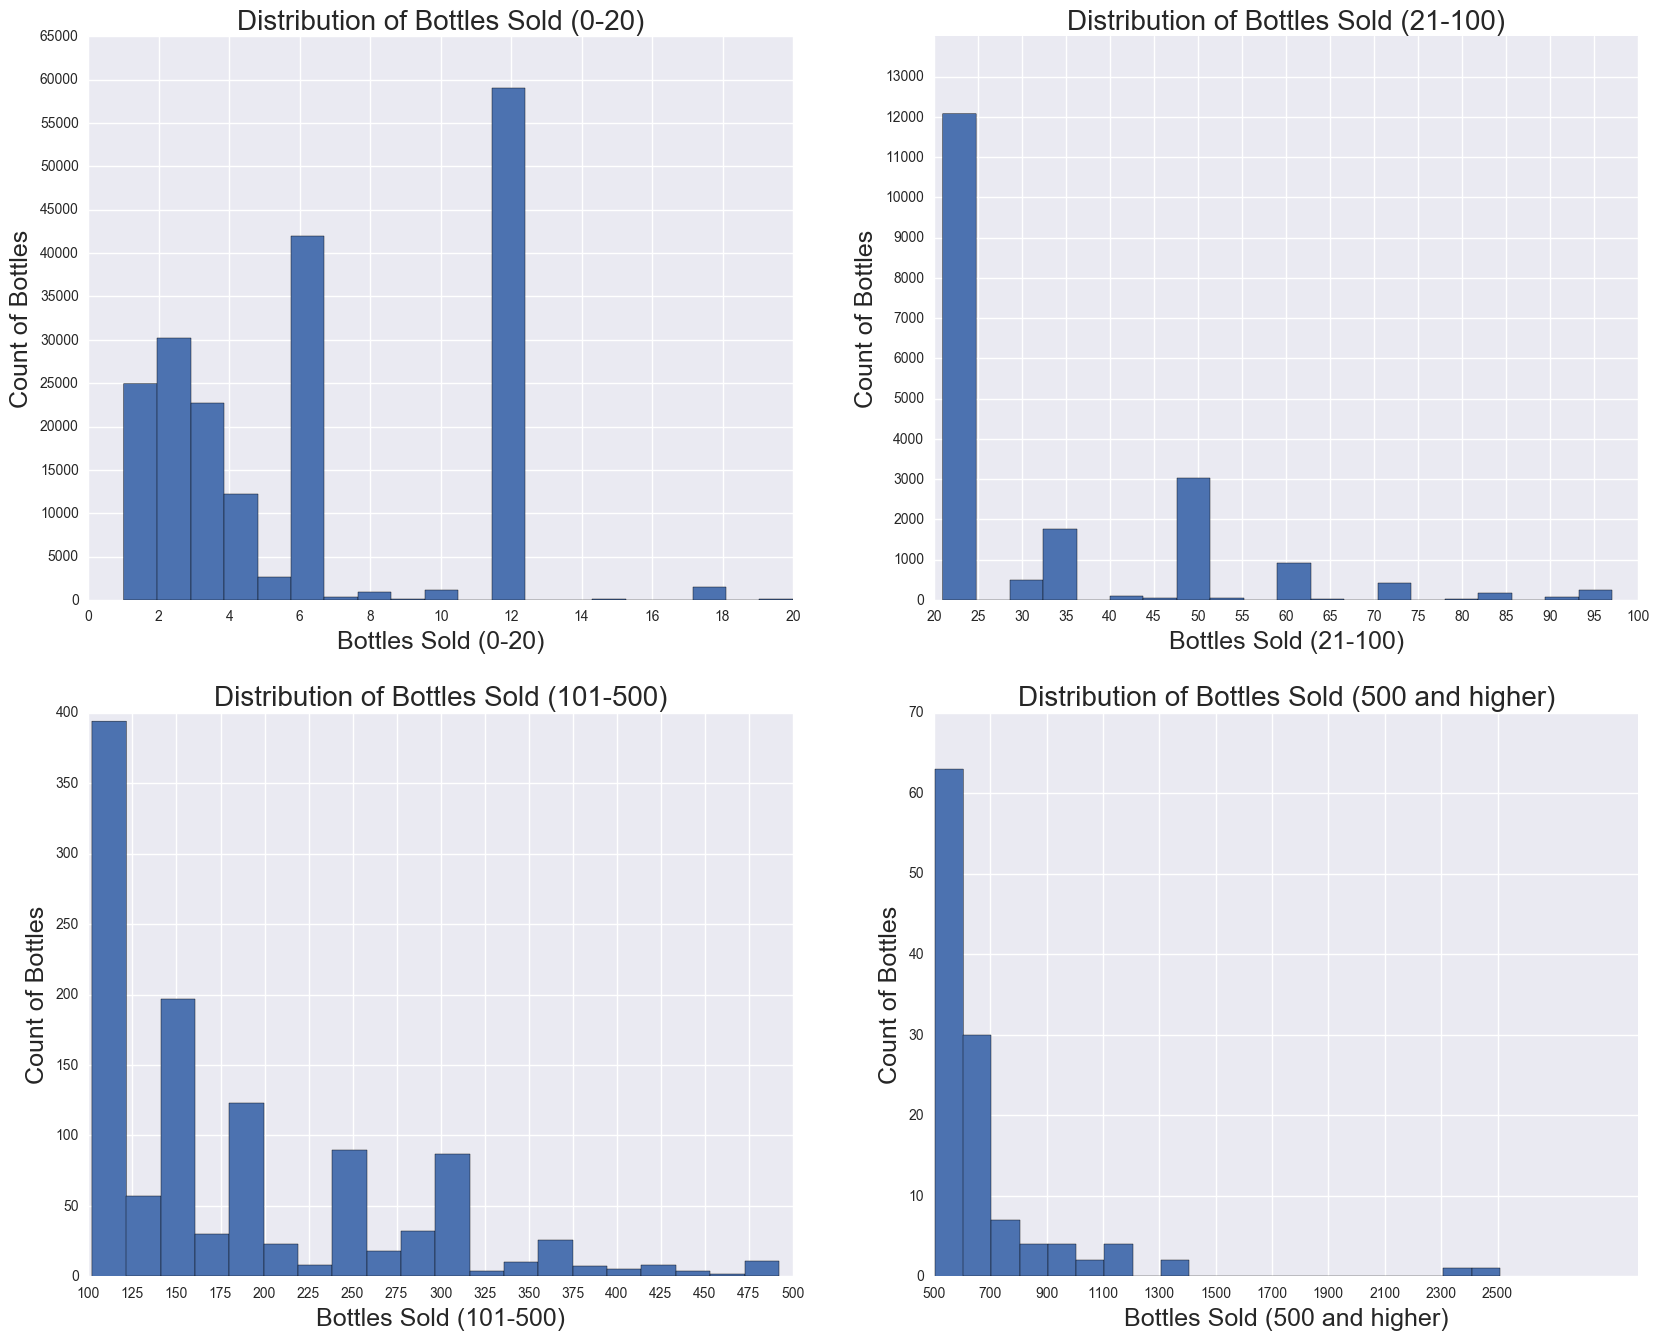

In [47]:
#evaluating bottles sold
fig, axes = plt.subplots(2,2, figsize=(20,16))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = df[df['Bottles Sold']<=20]['Bottles Sold'],bins = 20) 
axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][0].set_title('Distribution of Bottles Sold (0-20)',fontsize = 20)
axes[0][0].set_xlabel('Bottles Sold (0-20)',fontsize = 18)
axes[0][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 10 and less than or equal to 100
axes[0][1].hist(x = df[(df['Bottles Sold']>20) & (df['Bottles Sold']<=100)]['Bottles Sold'],bins = 20)
axes[0][1].xaxis.set_ticks(np.arange(20, 101, 5))
axes[0][1].yaxis.set_ticks(np.arange(0, 14000, 1000))
axes[0][1].set_title('Distribution of Bottles Sold (21-100)',fontsize = 20)
axes[0][1].set_xlabel('Bottles Sold (21-100)',fontsize = 18)
axes[0][1].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 100 and less than or equal to 500
axes[1][0].hist(x = df[(df['Bottles Sold']>100) & (df['Bottles Sold']<=500)]['Bottles Sold'],bins=20)
axes[1][0].xaxis.set_ticks(np.arange(100, 501, 25))
axes[1][0].set_title('Distribution of Bottles Sold (101-500)',fontsize = 20)
axes[1][0].set_xlabel('Bottles Sold (101-500)',fontsize = 18)
axes[1][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 500 and less than or equal to 2700
axes[1][1].hist(x = df[(df['Bottles Sold']>500) & (df['Bottles Sold']<=2700)]['Bottles Sold'],bins = 20)
axes[1][1].xaxis.set_ticks(np.arange(500, 2700, 200))
axes[1][1].set_title('Distribution of Bottles Sold (500 and higher)',fontsize = 20)
axes[1][1].set_xlabel('Bottles Sold (500 and higher)',fontsize = 18)
axes[1][1].set_ylabel('Count of Bottles',fontsize = 18);

Only considering bottles sold 25 and under, the summary statistics are shown below. While the data is still skewed for Bottles Sold and Sale (Dollars), one standard deviation from the mean will not result in negative Bottles Sold and Sale (Dollars).

In [48]:
df[df['Bottles Sold'] < 26].describe()

Store Number  Vendor Number    Item Number  Bottle Volume (ml)  \
count  209972.000000  209972.000000  209972.000000       209972.000000   
mean     3574.938144     256.002700   45987.777961          929.189392   
std       939.637685     141.524039   51971.895717          489.957932   
min      2106.000000      10.000000     173.000000           50.000000   
25%      2603.000000     115.000000   26828.000000          750.000000   
50%      3713.000000     260.000000   38178.000000          750.000000   
75%      4345.000000     380.000000   64676.000000         1000.000000   
max      9013.000000     978.000000  995507.000000         6000.000000   

       State Bottle Cost  State Bottle Retail   Bottles Sold  Sale (Dollars)  \
count      209972.000000        209972.000000  209972.000000   209972.000000   
mean            9.843098            14.782341       7.226535       95.188922   
std             7.044169            10.565687       5.912067       93.631837   
min             0.890000             1.340000       1.000000        1.340000   
25%             5.720000             8.630000       2.000000       29.980000   
50%             8.200000            12.300000       6.000000       67.470000   
75%            11.960000            17.940000      12.000000      129.120000   
max           425.000000           637.500000      25.000000     3712.500000   

          Total_Cost  Volume Sold (Liters)  Volume Sold (Gallons)  
count  209972.000000         209972.000000          209972.000000  
mean       63.379533              6.514019               1.721002  
std        62.388880              5.806351               1.533946  
min         0.890000              0.100000               0.030000  
25%        19.980000              1.500000               0.400000  
50%        44.970000              4.500000               1.190000  
75%        86.040000             10.500000               2.770000  
max      2475.000000            150.000000              39.630000

### Unique Items per Store
By creating unique items per store, we can use it as a proxy for store size, which will one of the predictors used in the regression. The histogram for unique per items shows that it is skewed.

(1372, 2)
The mean # of unique items per store is 97.4774052478
The max # of unique items per store is 739
The min # of unique items per store is 1
The median # of unique items per store is 52.0


Store Number  Unique_Items
0          2106           248
1          2113            94
2          2130           207
3          2152            71
4          2178           184

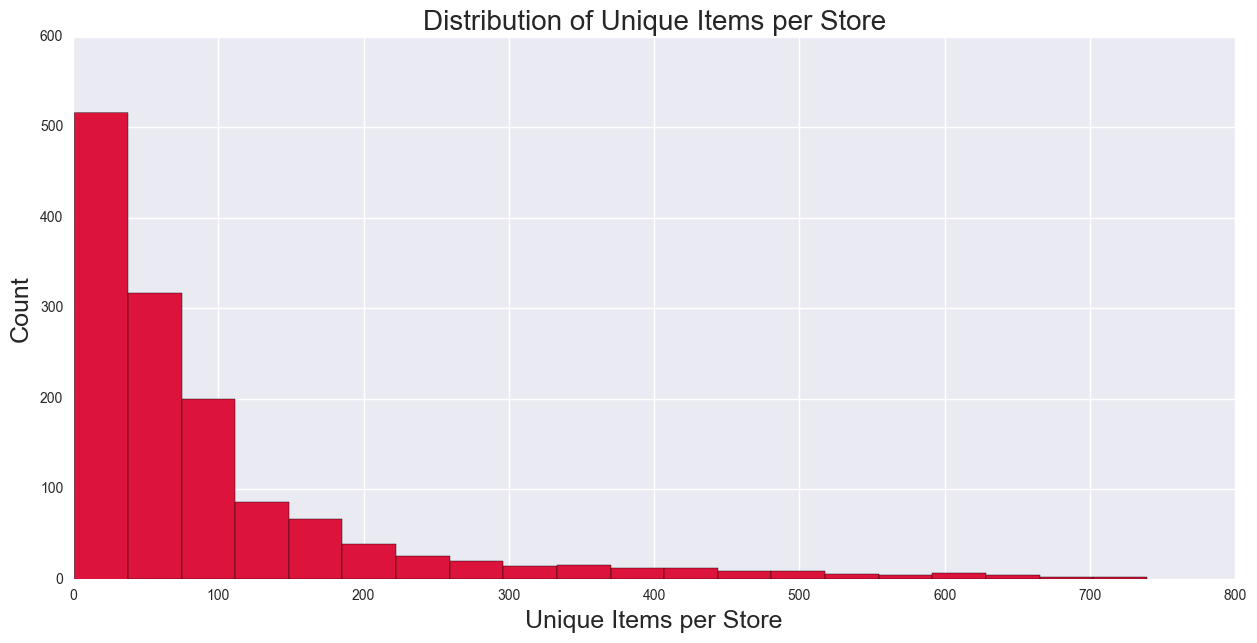

In [49]:
#creating unique items per store - possible proxy for sq footage given more items per store means a bigger store
#assumption is that that if an item did not sell, the business would remove them from the shelves, each business would maximize revenues
unique_items_per_store = df.groupby('Store Number')['Item Number'].nunique().to_frame('Unique_Items')
unique_items_per_store.reset_index(inplace = True)
unique_items_per_store.sort_values('Unique_Items',ascending = False)
print unique_items_per_store.shape
print "The mean # of unique items per store is", unique_items_per_store['Unique_Items'].mean()
print "The max # of unique items per store is", unique_items_per_store['Unique_Items'].max()
print "The min # of unique items per store is", unique_items_per_store['Unique_Items'].min()
print "The median # of unique items per store is", unique_items_per_store['Unique_Items'].median()

unique_items_per_store['Unique_Items'].hist(bins = 20, figsize = (15,7), color = 'crimson')
plt.title('Distribution of Unique Items per Store',fontsize = 20)
plt.xlabel('Unique Items per Store',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
ax = plt.gca()
unique_items_per_store.head()

Calculating the Number of Stores per City, which will be used for number of competitors as a predictor in the regression. From the histogram, the distribution is heavily skewed.

### Average Items per Store per City
Calculating Average Items per Store per City and Sales per Store, which will be used later in merges. Histogram shows that there is a skewed distribution.

In [50]:
county_demo = pd.read_csv('../Resources/IA_Data_Master.csv')

In [51]:
city_store = df.groupby(['City','Store Number'])['Zip Code'].nunique().to_frame('Count')
city_store.reset_index(inplace = True)
county_store = df.groupby(['County','Store Number'])['Zip Code'].nunique().to_frame('Count')
county_store.reset_index(inplace = True)
city_items = pd.merge(city_store,unique_items_per_store)
city_avgitems = city_items.groupby('City')['Unique_Items'].mean().to_frame('Average_items_store')
city_avgitems.reset_index(inplace = True)
sales_per_store = df[df['Bottles Sold'] < 26].groupby('Store Number')['Sale (Dollars)'].sum().to_frame()
sales_per_store.reset_index(inplace = True)
county_store

County  Store Number  Count
0         Adair          3461      1
1         Adair          3969      1
2         Adair          4317      1
3         Adair          4417      1
4         Adair          4620      1
5         Adair          4654      1
6         Adair          4753      1
7         Adair          5052      1
8         Adams          2327      1
9     Allamakee          2178      1
10    Allamakee          3857      1
11    Allamakee          4034      1
12    Allamakee          4289      1
13    Allamakee          4896      1
14    Allamakee          5017      1
15    Appanoose          2523      1
16    Appanoose          4027      1
17    Appanoose          4046      1
18    Appanoose          4232      1
19    Appanoose          4271      1
20    Appanoose          4472      1
21      Audubon          3631      1
22      Audubon          4523      1
23      Audubon          5173      1
24       Benton          4025      1
25       Benton          4059      1
26       Benton          4070      1
27       Benton          4228      1
28       Benton          4346      1
29       Benton          4551      1
...         ...           ...    ...
1342   Woodbury          4565      1
1343   Woodbury          4568      1
1344   Woodbury          4588      1
1345   Woodbury          4676      1
1346   Woodbury          4703      1
1347   Woodbury          4791      1
1348   Woodbury          4879      1
1349   Woodbury          4884      1
1350   Woodbury          4888      1
1351   Woodbury          4975      1
1352   Woodbury          5027      1
1353   Woodbury          5045      1
1354   Woodbury          5065      1
1355   Woodbury          5076      1
1356   Woodbury          5083      1
1357   Woodbury          5086      1
1358   Woodbury          5188      1
1359      Worth          3664      1
1360      Worth          4839      1
1361      Worth          5115      1
1362     Wright          3056      1
1363     Wright          3654      1
1364     Wright          4236      1
1365     Wright          4247      1
1366     Wright          4358      1
1367     Wright          4398      1
1368     Wright          4459      1
1369     Wright          4515      1
1370     Wright          4556      1
1371     Wright          4591      1

[1372 rows x 3 columns]

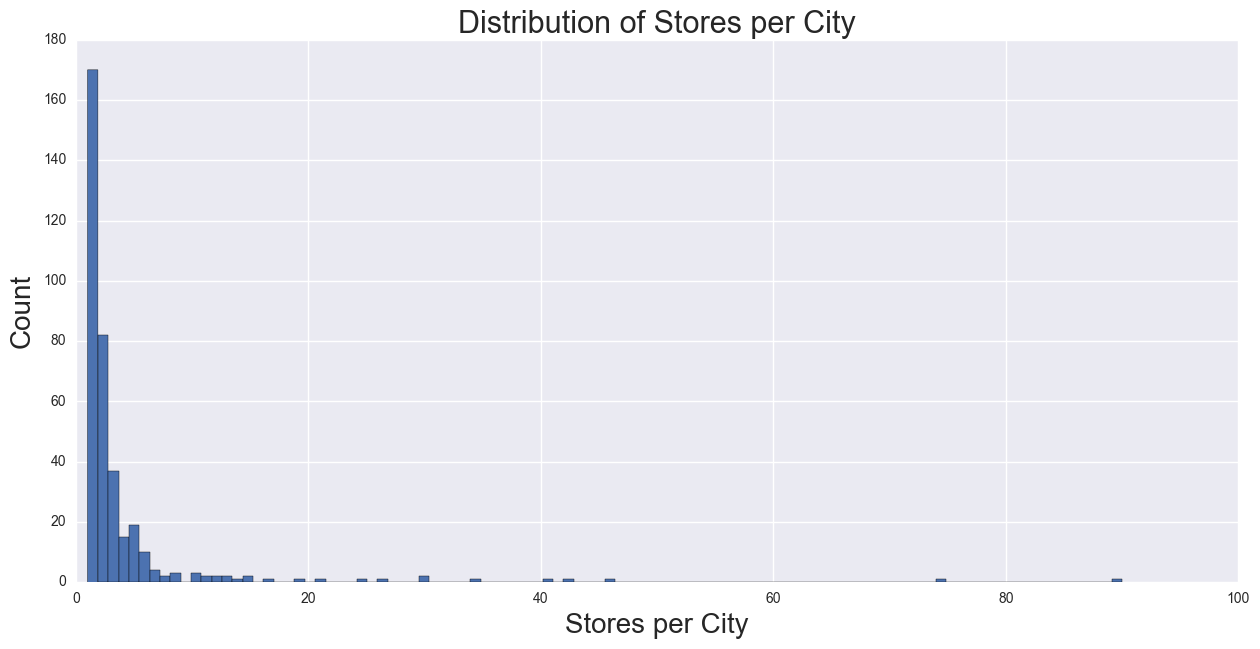

In [52]:
#creating stores per zip/city/county.
stores_per_city = df.groupby('City')['Store Number'].nunique().to_frame('Stores_per_City')
stores_per_city.reset_index(inplace = True)

stores_per_city.hist(figsize = (15,7),bins = 100)
#Stores per City is skewed
plt.title('Distribution of Stores per City',fontsize = 22)
plt.xlabel('Stores per City',fontsize = 20)
plt.ylabel('Count',fontsize = 20);

Starting from the df (original) dataframe, and merging with various dataframes created prior, a dataframe is created to build metrics to be used as predictors for the regression, which are the following:
* Bottles Sold
* Items per Store
* Average Price
* Stores per City
* Population

These predictors will be created from the df dataframe as well as external sources. The code below is the process for constructing these predictors.

#### 2015 Population by City

From the distribution of the histogram, Population by City is heavily skewed.

The mean of Population by City is: Population    2630.0
dtype: float64
The standard deviation of Population by City is: Population    11223.0
dtype: float64
Moving one standard deviation away from the mean would result in negative population, thus population is skewed


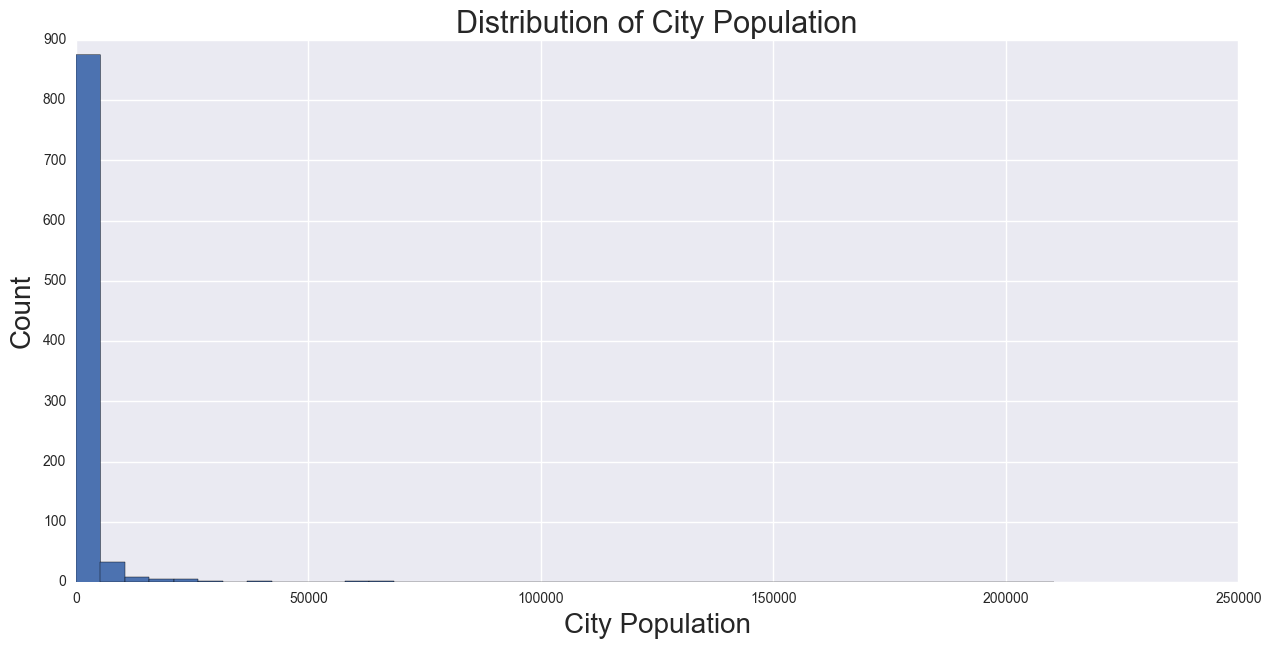

In [53]:
#Iowa population by City for 2015 from http://www.iowadatacenter.org/
city_pop_2015 = pd.read_csv('../Resources/IA_pop_2015.csv')
city_pop_2015.head()
city_pop_2015['City'] = city_pop_2015['City'].apply(lambda x: x.upper())

city_pop_2015.hist(figsize = (15,7),bins = 40)
plt.title('Distribution of City Population',fontsize = 22)
plt.xlabel('City Population',fontsize = 20)
plt.ylabel('Count',fontsize = 20);
print 'The mean of Population by City is:',city_pop_2015.mean().round(0)
print 'The standard deviation of Population by City is:',city_pop_2015.std().round(0)
print 'Moving one standard deviation away from the mean would result in negative population, thus population is skewed'

#### Categorizing the types of Liquor in the Data
By Categorizing the store name by whether it is a Liquor, Grocery, or Other, we can analyze the type of stores for the top 10 markets.

In [54]:
#categorizing each store number as Liquor, Grocery, or Other
store_names = pd.read_csv('../Resources/IA_Data_Stores.csv')
city_store = df.groupby(['Store Number','City'])['County'].nunique().to_frame()
city_store.reset_index(inplace = True)
total_citystore = pd.merge(city_store,store_names,on='Store Number')
store_type = []
liquor_list = []
grocery_list = []
other_list = []
liquor = ['liquor','spirits','wine','beverage','bottle','vineyard','beer','cellar','holler','distribution','central city','distributing']
grocery = ['hy-vee','fareway','target','wal-mart','food','supermarket',"dahl's","sam's club",'econ-o-mart','super valu','shop n save','grocery','pantry','costco','price chopper','save a lot']
for x in total_citystore['Store Name']:
    if any(word in x.lower() for word in liquor):
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    if any(word in x.lower() for word in grocery):
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    else:
        store_type.append('Other')
        liquor_list.append(0)
        grocery_list.append(0)
        other_list.append(1)
total_citystore['Store Type'] = pd.Series(store_type)
total_citystore['Liquor'] = pd.Series(liquor_list)
total_citystore['Grocery'] = pd.Series(grocery_list)
total_citystore['Other'] = pd.Series(other_list)
#adding dummy variables to the dataframe and selecting those columns
total_citystore_merge = total_citystore.iloc[:,[0,1,3,4,5,6,7]]
#grouping by city and the dummy variables for store types.
city_storetype = total_citystore_merge.groupby('City')['Liquor','Grocery','Other'].sum()
city_storetype.reset_index(inplace = True)

Bringing in County-level Per Capita Yearly Income, to be used as a predictor for the regression

In [55]:
county_data = pd.read_csv('../Resources/IA_Data_Master.csv')
county_data = pd.merge(county_store,county_data)
county_income = county_data.iloc[:,[1,3]]
#yearly income per county for which the county the store is located
county_income.head()

Store Number  Per Capita Yearly Income
0          3461                     25564
1          3969                     25564
2          4317                     25564
3          4417                     25564
4          4620                     25564

## Regression Analysis 

The dataframe will be constructed to get the target (df_y) and the data for the predictors (df_X), which will then be split into train and test sets. The target variable is Bottles Sold. The predictors that will be used are the following:
#### Target Variable:
* Yearly Bottles Sold (per each Store)

#### Predictors:
* Items per Store
* Average Price
* Stores per City
* Population
* Per Capita Yearly Income

#### Assumptions and Constraints:
* Constraining the data to bottles sold per transaction to 25 and under
* Each store in a city is competing against each other
* Log-normalization due to the skewness of the target and predictors
* Per Capital Yearly Income, which is for county, is uniform across cities in the county

Linear Regression will be peformed on the training set, which will then be used to predict Bottles Sold. Before the regression is performed. Both the target and the predictors will be log-normalized because of the skewness, as shown in the histograms earlier.

In [56]:
#using store number to build the dataframe to be used for regression
store_bottles_df = df[df['Bottles Sold'] < 26].groupby(['Store Number','City'])[['Bottles Sold','Sale (Dollars)']].sum()
store_bottles_df.reset_index(inplace = True)
# merging with unique items per store, which will be used as a predictor
store_bottles_uniq_df = pd.merge(store_bottles_df,unique_items_per_store)
#merging with total competitors per city, which will be used as a predictor
store_df = pd.merge(store_bottles_uniq_df,stores_per_city)
# creating a column for average price, which will be used as a predictor
store_df['AvgPrice'] = store_df['Sale (Dollars)'] / store_df['Bottles Sold']
#merging with city population for 2015, which will be used as a predictor

store_df = pd.merge(store_df,city_pop_2015,how='left')

#creating a groupby to find Bottles Sold and Sale (Dollars) by City and merging with main dataframe
city_sales = store_df.groupby('City')[['Bottles Sold','Sale (Dollars)']].sum()
city_sales.reset_index(inplace = True)
city_sales = city_sales.rename(columns = {'Bottles Sold':'Bottles_City','Sale (Dollars)':'Sales_City'})
store_df = pd.merge(store_df,city_sales)

store_df = pd.merge(store_df,county_income)
#creating dataframes for target and the predictors

df_y = np.log(store_df.iloc[:,2])
df_X = np.log(store_df.iloc[:,[4,5,6, 7,10]])

# splitting into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.33)

Now that the data and target have been created, linear regression will be performed.

Linear Regression r^2 between Actual y and Predicted y_hat : 0.881171769049
MSE for Training Set: 0.167276083512
------------------------------------------------
The Predictors are: Unique_Items, Stores_per_City, AvgPrice, Population, Per Capita Yearly Income
Linear Regression Coefficients are: [ 0.97176402 -0.05386496 -0.16215954  0.08107046  0.11056419]
A 1% change in Unique_Items results in 0.97% change in Bottles Sold
A 1% change in Stores_per_City is: -0.05% change in Bottles Sold
A 1% change in AvgPrice is: -0.16% change in Bottles Sold
A 1% change in Population is: 0.08% change in Bottles Sold
A 1% change in Per Capita Yearly Income is: 0.11% change in Bottles Sold
------------------------------------------------
Test Training Set:
The r^2 on the test data is: 0.874559560343
MSE for Test Set: 0.197085177377


Store Number         City  Bottles Sold  Sale (Dollars)  Unique_Items  \
0          2106  CEDAR FALLS          5393        81026.24           248   
1          2572  CEDAR FALLS          5445        76956.87           739   
2          2835  CEDAR FALLS           760        11303.42            73   
3          3769  CEDAR FALLS          3402        47338.44           139   
4          3995  CEDAR FALLS          2210        34036.77            98   

   Stores_per_City   AvgPrice  Population  Bottles_City  Sales_City  \
0               17  15.024335       41255         29003   399731.96   
1               17  14.133493       41255         29003   399731.96   
2               17  14.872921       41255         29003   399731.96   
3               17  13.914885       41255         29003   399731.96   
4               17  15.401253       41255         29003   399731.96   

   Per Capita Yearly Income  Pred_Bottles     Pred_Sales  
0                     24273   2578.074544   38733.856246  
1                     24273   7523.216780  106329.332551  
2                     24273    786.822796   11702.353327  
3                     24273   1487.169965   20693.799574  
4                     24273   1041.622544   16042.292748

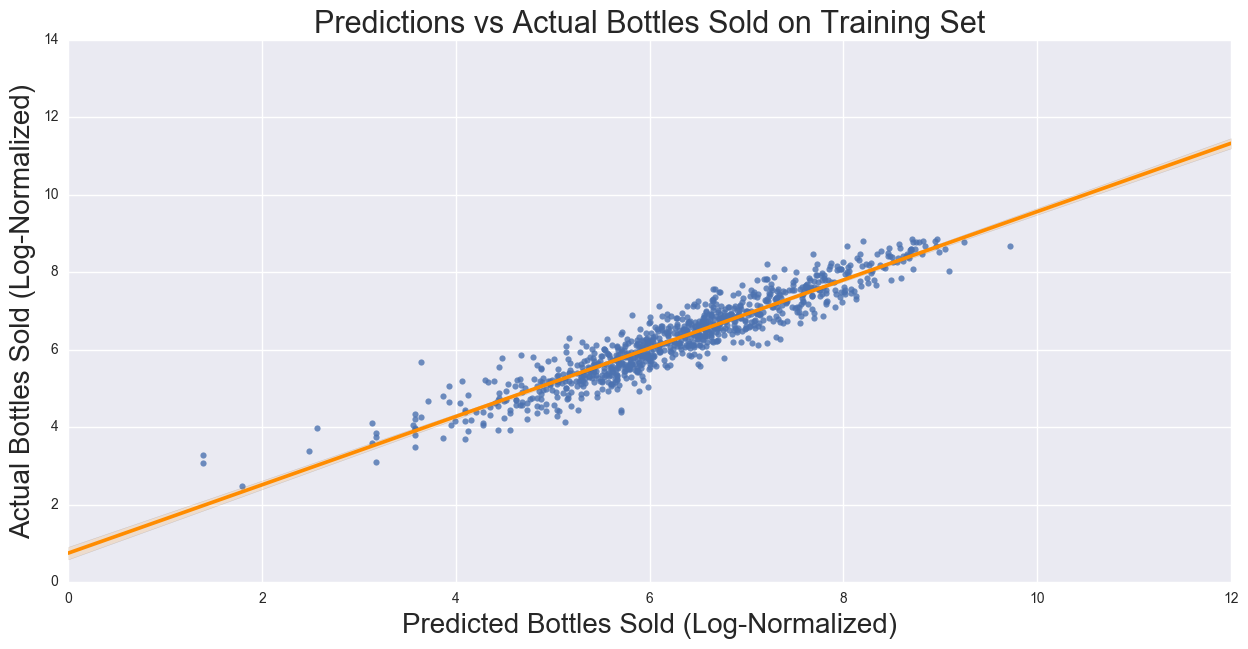

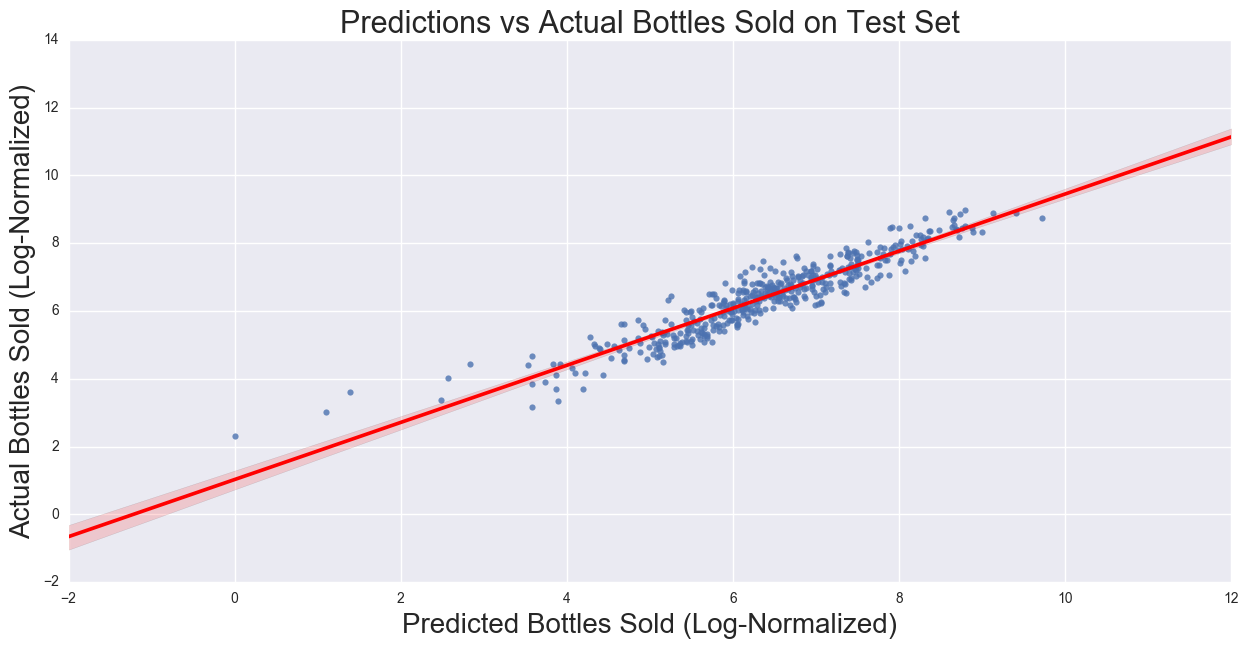

In [212]:
#loading necessary methods
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.cross_validation import cross_val_predict,cross_val_score

#using linear regression
lr = linear_model.LinearRegression()

#fitting and predicting the model
lr_model = lr.fit(X_train,y_train)
lr_predict = lr.predict(X_train)
#computing the r-squared
lr_r2 =  r2_score(y_true=y_train, y_pred=lr_predict)
print 'Linear Regression r^2 between Actual y and Predicted y_hat :',lr_r2
print 'MSE for Training Set:',mean_squared_error(y_train,lr_predict)
print '------------------------------------------------'
print 'The Predictors are: {}, {}, {}, {}, {}'.format(df_X.columns[0],df_X.columns[1],df_X.columns[2],df_X.columns[3],df_X.columns[4])
print 'Linear Regression Coefficients are:',lr_model.coef_
print 'A 1% change in {} results in {}% change in Bottles Sold'.format(df_X.columns[0], (((1.01**lr_model.coef_[0])-1)*100).round(2))
print 'A 1% change in {} is: {}% change in Bottles Sold'.format(df_X.columns[1], (((1.01**lr_model.coef_[1])-1)*100).round(2))
print 'A 1% change in {} is: {}% change in Bottles Sold'.format(df_X.columns[2], (((1.01**lr_model.coef_[2])-1)*100).round(2))
print 'A 1% change in {} is: {}% change in Bottles Sold'.format(df_X.columns[3], (((1.01**lr_model.coef_[3])-1)*100).round(2))
print 'A 1% change in {} is: {}% change in Bottles Sold'.format(df_X.columns[4], (((1.01**lr_model.coef_[4])-1)*100).round(2))
plt.figure(figsize = (15,7))
sns.regplot(y_train,lr_predict,line_kws = {'color':'darkorange'})
plt.title('Predictions vs Actual Bottles Sold on Training Set',fontsize = 22)
plt.xlabel('Predicted Bottles Sold (Log-Normalized)',fontsize = 20)
plt.ylabel('Actual Bottles Sold (Log-Normalized)',fontsize = 20)
print '------------------------------------------------'
print "Test Training Set:"
y_test_predict = lr.predict(X_test)
test_linear_r2 =  r2_score(y_true=y_test, y_pred=lr.predict(X_test))
print 'The r^2 on the test data is:',test_linear_r2
print 'MSE for Test Set:',mean_squared_error(y_test,y_test_predict)
#model fits on test data


plt.figure(figsize = (15,7))
sns.regplot(y_test,y_test_predict,line_kws = {'color':'red'})
plt.title('Predictions vs Actual Bottles Sold on Test Set',fontsize = 22)
plt.xlabel('Predicted Bottles Sold (Log-Normalized)',fontsize = 20)
plt.ylabel('Actual Bottles Sold (Log-Normalized)',fontsize = 20)
dfy_predict = lr.predict(df_X)
store_df['Pred_Bottles'] = np.exp(dfy_predict)
store_df['Pred_Sales'] = store_df['Pred_Bottles'] * store_df['AvgPrice']
store_df.head()

#### Analysis of the Results
The correlation on the training dataset is 0.88. The coefficients for the regression show the strongest predictor is  Unique Items (positively correlated), followed by Average Price (negatively correlated), Stores per City/Number of competition (negatively correlated), and Population and Per Capital Yearly Income (both positively correlated). These relationships are what we expect to see: the number of items in a store would show that more available products to purchase, and as the number of competitors in the city as well as price should decrease the bottles sold. Population and Income should be positively correlated as the more people are in a city, the higher demand should be, and the more disposable income a person has, the more the person is able to spend on liquor. If the assumption of the Yearly per Capita Income is uniformly distributed across all cities in the county does not hold, then there would be a stronger bias, which requires city level Yearly per Capital Income.

What happens if another store enters the market? Assuming Quantity (Bottles Sold per City) and Avg Price does not change (also means Total Sales (Dollars) per city does not change), if we increased number of stores per city by 1, we can calculate the new AvgSales with entry of a new store. Sorting from highest to lowest, we will find top 10 cities as consideration for markets to expand.

Once we know which markets to enter, we can find the average number of items among the competitors,types of competitors, and also the items and prices to which we place in the store.

Mean of Average Items/Store in the Top 10 Cities is: 164.335799397
The following cities are either suburbs (Windsor Heights, Bettendorf, Coralville), college towns 
 (Mt. Vernon, Iowa City, Cedar Falls), or near a resort/lake (Spirit Lake, Milford, Mason City)

The store type has been incorporated to show the types of stores in a given city


City  Number of Stores  Total Sales (Dollars)  \
0        MT VERNON               3.0              130172.81   
1  WINDSOR HEIGHTS               6.0              198687.11   
2          MILFORD               2.0               84245.46   
3       BETTENDORF              12.0              343749.94   
4        IOWA CITY              26.0              670082.63   
5       MASON CITY              13.0              314249.36   
6          CLINTON              10.0              245612.03   
7      SPIRIT LAKE               6.0              155668.34   
8      CEDAR FALLS              17.0              399731.96   
9       CORALVILLE              13.0              308774.21   

   Number of Stores + 1      AvgSales  AvgSales_w_entry  Delta Sales%  \
0                   4.0  43390.936667      32543.202500     -0.250000   
1                   7.0  33114.518333      28383.872857     -0.142857   
2                   3.0  42122.730000      28081.820000     -0.333333   
3                  13.0  28645.828333      26442.303077     -0.076923   
4                  27.0  25772.408846      24817.875185     -0.037037   
5                  14.0  24173.027692      22446.382857     -0.071429   
6                  11.0  24561.203000      22328.366364     -0.090909   
7                   7.0  25944.723333      22238.334286     -0.142857   
8                  18.0  23513.644706      22207.331111     -0.055556   
9                  14.0  23751.862308      22055.300714     -0.071429   

   Population  Liquor  Grocery  Other  Average_items_store  
0        4486       1        0      2           178.666667  
1        4889       1        2      3           199.000000  
2        3018       0        2      0           241.000000  
3       35505       2        2      8           132.416667  
4       74220       3        7     16           151.615385  
5       27366       3        5      5           155.692308  
6       26064       0        5      5           136.200000  
7        5018       1        0      5           147.500000  
8       41255       2        4     11           163.882353  
9       20608       0        7      6           137.384615

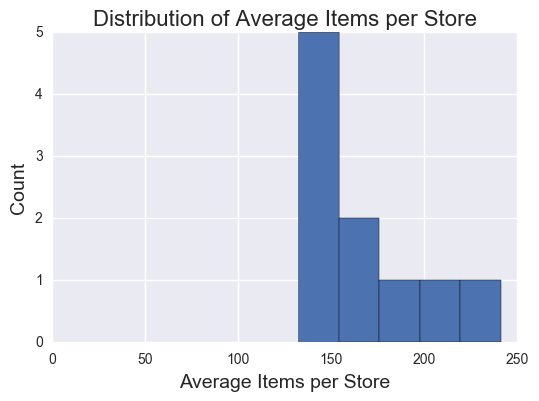

In [213]:
city_sales = store_df.groupby('City')['Sale (Dollars)'].agg({len,sum})
city_sales.reset_index(inplace = True)
city_sales = city_sales.rename(columns = {'sum':'Total Sales (Dollars)','len':'Number of Stores'})
city_sales['Number of Stores + 1'] = city_sales['Number of Stores'] + 1
city_sales['AvgSales'] = city_sales['Total Sales (Dollars)'] / city_sales['Number of Stores']
city_sales['AvgSales_w_entry'] = city_sales['Total Sales (Dollars)']/city_sales['Number of Stores + 1']
city_sales['Delta Sales%'] = (city_sales['AvgSales_w_entry']-city_sales['AvgSales'])/city_sales['AvgSales']


top10_cities = city_sales.sort_values('AvgSales_w_entry',ascending = False).head(10)
top10_cities = pd.merge(top10_cities,city_pop_2015)
#merging with store types from the code in the cell below
top10_cities = pd.merge(top10_cities,city_storetype)
#bringing in average items per city
top10_cities = pd.merge(top10_cities,city_avgitems)
top10_cities['Average_items_store'].hist(bins = 5)
plt.title('Distribution of Average Items per Store',fontsize = 16)
plt.xlabel('Average Items per Store',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.xlim(0,250)
Avg_item_top10 = top10_cities['Average_items_store'].mean()
print 'Mean of Average Items/Store in the Top 10 Cities is:',Avg_item_top10

print "The following cities are either suburbs (Windsor Heights, Bettendorf, Coralville), college towns \n (Mt. Vernon, Iowa City, Cedar Falls), or near a resort/lake (Spirit Lake, Milford, Mason City)"
print ''
print 'The store type has been incorporated to show the types of stores in a given city'
top10_cities

The following cities are either subarbs (Windsor Heights, Bettendorf, Coralville), college towns (Mt. Vernon, Iowa CityCedar Falls, or near a resort/lake (Spirit Lake, Milford, Mason City). Categorizing the Category Name to bins of liquor types, we can find the ideal mix of inventory using the average items per store, which was calculated above (164 items per store)

In [214]:
#make all category names upper case
#create category bins to be used for portfolio
df['Category Name'] = df['Category Name'].apply(lambda x: str(x).upper())
category = df.groupby('Category Name')['Item Number'].nunique().to_frame()
category.reset_index(inplace = True)
#creating category bins 
items = df.copy()
cat_bins = []
for x in items['Category Name']:
    if 'VODKA' in x:
        cat_bins.append('VODKA')
    elif 'WHISKEY' in x:
        cat_bins.append('WHISKEY')
    elif 'WHISKIES' in x:
        cat_bins.append('WHISKEY')
    elif 'RUM' in x:
        cat_bins.append('RUM')
    elif 'SCHNAPPS' in x:
        cat_bins.append('SCHNAPPS')
    elif 'BRANDIES' in x:
        cat_bins.append('BRANDIES')    
    elif 'GIN' in x:
        cat_bins.append('GIN') 
    elif 'SCOTCH' in x:
        cat_bins.append('SCOTCH') 
    elif 'BOURBON' in x:
        cat_bins.append('BOURBON')
    elif 'AMARETTO' in x:
        cat_bins.append('AMARETTO')         
    elif 'TEQUILA' in x:
        cat_bins.append('TEQUILA') 
    else:
        cat_bins.append('OTHER')
#setting a new column called cat_bins where it is categories of each type of liquor sold
items['cat_bins'] = cat_bins
print 'The OTHER Category represents:',items[items['cat_bins'] == 'OTHER']['Category Name'].unique()
#only looking at the top 10 cities chosen
top10_city_df = top10_cities.iloc[:,0].to_frame()
items_top10 = pd.merge(items,top10_city_df)
#grouping by city we see the total amount of liquor sold per category
categories_top10 = items_top10.groupby(['City','cat_bins'])['Bottles Sold'].agg({len,sum})
categories_top10.reset_index(inplace = True)

#finding total bottles sold per city
bottles_sold_top10 = categories_top10.groupby('City')['sum'].sum().to_frame()
bottles_sold_top10.reset_index(inplace = True)

#merging with categories we can show the % of category of liquor sold per each city
category_mix_top10 = pd.merge(categories_top10,bottles_sold_top10,on='City')
category_mix_top10 = category_mix_top10.rename(columns = {'sum_x':'Bottles_cat','sum_y':'City_Bottles_cat'})
category_mix_top10['PCT'] = category_mix_top10['Bottles_cat'] / category_mix_top10['City_Bottles_cat']

#what about what is the highest mix of categories out of all the top10?
category_mix_total = category_mix_top10.groupby('cat_bins')['Bottles_cat'].sum().to_frame()
category_mix_total.reset_index(inplace = True)
category_mix_total['PCT'] = category_mix_total['Bottles_cat'] / category_mix_total['Bottles_cat'].sum()
category_mix_total = category_mix_total.rename(columns = {'Bottles_cat':'Total_Bottles_cat'})
category_mix_total.sort_values('PCT',ascending = False)

#Vodka, Whiskey, and Rum are the top 3 types of liquor. 
#The average items per store for top 10 is 164.
#Assuming this would be the size of the store, lets multiply the percentages times 164
category_mix_total['Ideal_Mix_Qty'] = (category_mix_total['PCT'] * 164).round()
print '\n'
print 'The ideal mix of liquors, assuming 164 items per store,for a new store should be:'
print category_mix_total.iloc[:,[0,3]]
category_mix_top10

The OTHER Category represents: ['AMERICAN COCKTAILS' 'DISTILLED SPIRITS SPECIALTY'
 'MISC. AMERICAN CORDIALS & LIQUEURS' 'MISC. IMPORTED CORDIALS & LIQUEURS'
 'CREAM LIQUEURS' 'TRIPLE SEC' 'AMERICAN ALCOHOL' 'COFFEE LIQUEURS'
 'DECANTERS & SPECIALTY PACKAGES' 'REPOSADO' 'CREME DE ALMOND' 'ROCK & RYE'
 'WHITE CREME DE MENTHE' 'WHITE CREME DE CACAO' 'DARK CREME DE CACAO'
 'GREEN CREME DE MENTHE' 'NAN' 'ANISETTE' 'HIGH PROOF BEER - AMERICAN'
 'MOONSHINE']


The ideal mix of liquors, assuming 164 items per store,for a new store should be:
    cat_bins  Ideal_Mix_Qty
0   AMARETTO            1.0
1    BOURBON            0.0
2   BRANDIES            6.0
3        GIN            6.0
4      OTHER           18.0
5        RUM           21.0
6   SCHNAPPS            7.0
7     SCOTCH            1.0
8    TEQUILA            9.0
9      VODKA           49.0
10   WHISKEY           46.0


City  cat_bins   len  Bottles_cat  City_Bottles_cat       PCT
0         BETTENDORF  AMARETTO    22          224             37030  0.006049
1         BETTENDORF   BOURBON     3           16             37030  0.000432
2         BETTENDORF  BRANDIES   120          850             37030  0.022954
3         BETTENDORF       GIN   142         1297             37030  0.035026
4         BETTENDORF     OTHER   407         4160             37030  0.112341
5         BETTENDORF       RUM   331         5024             37030  0.135674
6         BETTENDORF  SCHNAPPS   156         1809             37030  0.048852
7         BETTENDORF    SCOTCH    69          212             37030  0.005725
8         BETTENDORF   TEQUILA   177         2881             37030  0.077802
9         BETTENDORF     VODKA   808        11118             37030  0.300243
10        BETTENDORF   WHISKEY   747         9439             37030  0.254901
11       CEDAR FALLS  AMARETTO    26          248             39989  0.006202
12       CEDAR FALLS   BOURBON     9           40             39989  0.001000
13       CEDAR FALLS  BRANDIES   147          708             39989  0.017705
14       CEDAR FALLS       GIN   235         1370             39989  0.034259
15       CEDAR FALLS     OTHER   510         4795             39989  0.119908
16       CEDAR FALLS       RUM   546         6094             39989  0.152392
17       CEDAR FALLS  SCHNAPPS   282         2221             39989  0.055540
18       CEDAR FALLS    SCOTCH    76          159             39989  0.003976
19       CEDAR FALLS   TEQUILA   242         1820             39989  0.045513
20       CEDAR FALLS     VODKA  1248        11235             39989  0.280952
21       CEDAR FALLS   WHISKEY  1274        11299             39989  0.282553
22           CLINTON  AMARETTO    24          211             23938  0.008814
23           CLINTON   BOURBON     3            6             23938  0.000251
24           CLINTON  BRANDIES   170         1451             23938  0.060615
25           CLINTON       GIN   101          671             23938  0.028031
26           CLINTON     OTHER   287         2342             23938  0.097836
27           CLINTON       RUM   328         3046             23938  0.127245
28           CLINTON  SCHNAPPS   155         1596             23938  0.066672
29           CLINTON    SCOTCH    12           29             23938  0.001211
..               ...       ...   ...          ...               ...       ...
77         MT VERNON  BRANDIES    24          163             14635  0.011138
78         MT VERNON       GIN    39          375             14635  0.025624
79         MT VERNON     OTHER   136         4028             14635  0.275231
80         MT VERNON       RUM    85         1646             14635  0.112470
81         MT VERNON  SCHNAPPS    93         1156             14635  0.078989
82         MT VERNON    SCOTCH    13           60             14635  0.004100
83         MT VERNON   TEQUILA    90          986             14635  0.067373
84         MT VERNON     VODKA   224         3017             14635  0.206150
85         MT VERNON   WHISKEY   238         3127             14635  0.213666
86       SPIRIT LAKE  AMARETTO     6           54             14357  0.003761
87       SPIRIT LAKE  BRANDIES    46          227             14357  0.015811
88       SPIRIT LAKE       GIN    60          502             14357  0.034966
89       SPIRIT LAKE     OTHER   168         1681             14357  0.117086
90       SPIRIT LAKE       RUM   194         2185             14357  0.152191
91       SPIRIT LAKE  SCHNAPPS    65          502             14357  0.034966
92       SPIRIT LAKE    SCOTCH    11           22             14357  0.001532
93       SPIRIT LAKE   TEQUILA    54          496             14357  0.034548
94       SPIRIT LAKE     VODKA   367         4683             14357  0.326182
95       SPIRIT LAKE   WHISKEY   394         4005             14357  0.278958
96   WINDSOR HEIGHTS  AMARETTO    14  

## Conclusion

Given the 10% random sample of the Iowa Liquor Sales, the log-normalized Linear Regression Model was used to fit the data to the model. Using the yearly Bottles Sold per each store as the target variables, the predictors Unique Items per Store, Stores per City, Avg Price, Population, and Income were used to fit the model. The correlation and MSE of the data was 0.88 and 0.17, respectively. The model was then used to predict on the test set, and comparing actual Bottles Sold to predicted Bottles Sold 0.87 and 0.19, respectively.

Top 10 Cities are recommended using Average Sales per number of competition, which is stores per city. Since we are interested in the scenario where a new store enters the market. We add 1 to the stores per city and divide Avg Sales by this number. Also assumed was that avg price and bottles sold per city were constant. The following cities are recommended for new markets for a new store location: Mt Vernon, Windsor Heights, Milford, Bettendorf, Iowa City, Mason City, Clinton, Spirit Lake, Cedar Falls, and Coralville. Using the types of Liquor sold (binning them into types), the ideal mix of products to be sold was calculated, which is based on the aggregate of top 10 cities. 

Further Analysis can be performed on the brand and size of each type of liquor, as well as the optimal price based on calculated price elasticities. 

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

## Plot Ideas

* Barchart of % of liquor stores compared to all stores
* Catergory Breakdown, average by county for key counties
* Barchart of percentage difference of Sales/(N+1) - Sales/N, and corresponding subsequent sales
* Barchart of # of categories vs sales -> Show how # of categories affects sales (So, use all data)
* 3 sets of graphs for comaprison; college towns, lake towns, suburb towns
  * Use descriptive metrics like barchart of liquors carried percentages
  * Bottle Counts
* Distribution of populations and store counts for cities that are recommended

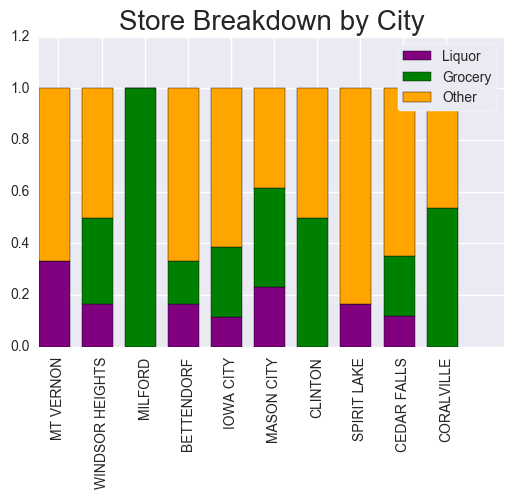

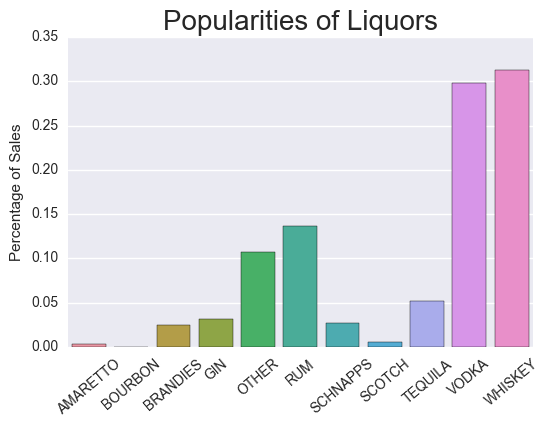

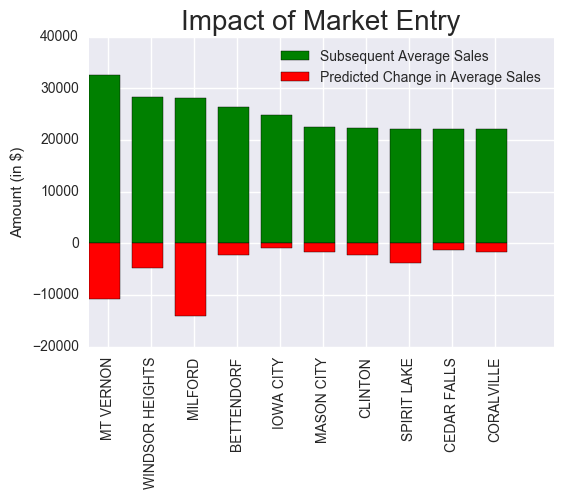

In [215]:
#Barchart of Fraction of Stores that are Liquor Stores by City
l=[]
for x in top10_cities.index:
    l.append([top10_cities.iloc[x,[0]][0],top10_cities.iloc[x,[8]][0]/float((top10_cities.iloc[x,[8]][0]\
            +top10_cities.iloc[x,[9]][0]+top10_cities.iloc[x,[10]][0])),top10_cities.iloc[x,[9]][0]/float((\
            top10_cities.iloc[x,[8]][0]+top10_cities.iloc[x,[9]][0]+top10_cities.iloc[x,[10]][0])),\
              top10_cities.iloc[x,[10]][0]/float((top10_cities.iloc[x,[8]][0]+top10_cities.iloc[x,[9]][0]+\
                                                 top10_cities.iloc[x,[10]][0]))])
l=np.array(l).T
plt.bar(np.linspace(0,len(l[0]),len(l[0])),l[1],label='Liquor',color='Purple')
plt.bar(np.linspace(0,len(l[0]),len(l[0])),l[2],bottom=l[1],label='Grocery',color='Green')
plt.bar(np.linspace(0,len(l[0]),len(l[0])),l[3],bottom=[float(a)+float(b) for a,b in zip(l[2],l[1])],label="Other",\
       color="Orange")
plt.legend(loc='upper right',frameon=True,fancybox=True)
plt.title("Store Breakdown by City",size=20)
plt.xticks(np.linspace(.5,len(l[0])+.5,len(l[0])),l[0],rotation=90)
#plt.ylabel("Fraction of Stores that are Liquor Stores \n By City")
plt.show()
i=1
# fig, axes = plt.subplots(5,2, figsize=(8,20))
# for x in category_mix_top10['City'].unique():
#     temp=category_mix_top10[category_mix_top10["City"]==x]
#     plt.subplot(5,2,i)
#     plt.bar(np.linspace(0,len(temp[temp["City"]==x]),len(temp[temp["City"]==x])),\
#                        temp[temp['City']==x]['PCT'])
#     plt.title("Stuff",y=.99)
#     plt.xticks(np.linspace(.5,len(temp[temp["City"]==x])+.5,len(temp[temp["City"]==x])),\
#                temp[temp["City"]==x]["cat_bins"],rotation=90)
#     i+=1
# plt.show()

#Liquor Popularities
sns.barplot(x="cat_bins",y="PCT",data=temp)
plt.title("Popularities of Liquors",size=20)
plt.xlabel("")
plt.ylabel("Percentage of Sales")
plt.xticks(rotation=40)
plt.show()

#Deltas and Subsequent Sales
plt.bar(np.linspace(0,len(l[0]),len(l[0])),top10_cities['AvgSales_w_entry'],color='green',\
        label="Subsequent Average Sales")
plt.bar(np.linspace(0,len(l[0]),len(l[0])),(top10_cities['AvgSales_w_entry']-top10_cities['AvgSales']),color='red',\
        label="Predicted Change in Average Sales")
plt.title("Impact of Market Entry",size=20)
plt.xticks(np.linspace(.5,len(l[0])+.5,len(l[0])),l[0],rotation=90)
plt.ylabel("Amount (in $)")
plt.legend(loc="upper right")
plt.show()

In [216]:
top10_cities
#category_mix_top10

City  Number of Stores  Total Sales (Dollars)  \
0        MT VERNON               3.0              130172.81   
1  WINDSOR HEIGHTS               6.0              198687.11   
2          MILFORD               2.0               84245.46   
3       BETTENDORF              12.0              343749.94   
4        IOWA CITY              26.0              670082.63   
5       MASON CITY              13.0              314249.36   
6          CLINTON              10.0              245612.03   
7      SPIRIT LAKE               6.0              155668.34   
8      CEDAR FALLS              17.0              399731.96   
9       CORALVILLE              13.0              308774.21   

   Number of Stores + 1      AvgSales  AvgSales_w_entry  Delta Sales%  \
0                   4.0  43390.936667      32543.202500     -0.250000   
1                   7.0  33114.518333      28383.872857     -0.142857   
2                   3.0  42122.730000      28081.820000     -0.333333   
3                  13.0  28645.828333      26442.303077     -0.076923   
4                  27.0  25772.408846      24817.875185     -0.037037   
5                  14.0  24173.027692      22446.382857     -0.071429   
6                  11.0  24561.203000      22328.366364     -0.090909   
7                   7.0  25944.723333      22238.334286     -0.142857   
8                  18.0  23513.644706      22207.331111     -0.055556   
9                  14.0  23751.862308      22055.300714     -0.071429   

   Population  Liquor  Grocery  Other  Average_items_store  
0        4486       1        0      2           178.666667  
1        4889       1        2      3           199.000000  
2        3018       0        2      0           241.000000  
3       35505       2        2      8           132.416667  
4       74220       3        7     16           151.615385  
5       27366       3        5      5           155.692308  
6       26064       0        5      5           136.200000  
7        5018       1        0      5           147.500000  
8       41255       2        4     11           163.882353  
9       20608       0        7      6           137.384615

In [255]:
# temp=store_df.groupby("City")['Pred_Sales'].mean().sort_values(ascending=False).to_frame().copy()
# temp=temp.reset_index()
# pd.merge(temp,store_df,on="City",how='inner')
# store_df
store_df

Store Number           City  Bottles Sold  Sale (Dollars)  Unique_Items  \
0             2106    CEDAR FALLS          5393        81026.24           248   
1             2572    CEDAR FALLS          5445        76956.87           739   
2             2835    CEDAR FALLS           760        11303.42            73   
3             3769    CEDAR FALLS          3402        47338.44           139   
4             3995    CEDAR FALLS          2210        34036.77            98   
5             4119    CEDAR FALLS           424         7169.42            32   
6             4147    CEDAR FALLS          1064        15156.59            94   
7             4590    CEDAR FALLS           284         2834.86            17   
8             4631    CEDAR FALLS           355         3883.67            31   
9             4723    CEDAR FALLS           108         1405.32             8   
10            4907    CEDAR FALLS           779         7102.31            75   
11            4914    CEDAR FALLS          1053         8437.35            55   
12            4932    CEDAR FALLS           784         8044.98            79   
13            4947    CEDAR FALLS          1318        16472.01           232   
14            4958    CEDAR FALLS           952        10186.00           147   
15            4959    CEDAR FALLS          1565        18866.02           139   
16            4988    CEDAR FALLS          3107        49511.69           580   
17            2113         GOWRIE           671         9310.22            94   
18            5141         GOWRIE            93         1009.44            10   
19            2130       WATERLOO          4190        59130.23           207   
20            2538       WATERLOO          3394        47817.29           483   
21            2564       WATERLOO          2712        35222.64           240   
22            2571       WATERLOO          4169        51135.74           321   
23            2575       WATERLOO          1553        18516.30           152   
24            2643       WATERLOO          3551        55094.79           470   
25            2836       WATERLOO           171         2330.58            40   
26            2837       WATERLOO           592         7284.38            59   
27            3494       WATERLOO          2496        40216.20           127   
28            3663       WATERLOO          2118        29367.54            88   
29            3690       WATERLOO           807        12965.75            68   
...            ...            ...           ...             ...           ...   
1340          5181         DENVER           102          963.04            10   
1341          5017        LANSING           732         8060.58            75   
1342          5020       STANWOOD            36          265.20             4   
1343          5021        OKOBOJI           213         2799.69            26   
1344          5026  NORTH ENGLISH           141         1301.32            29   
1345          5031        RAYMOND           461         4914.68            95   
1346          5040         WILTON           230         2133.84            15   
1347          5070         WILTON           634         6691.12           122   
1348          5044       CRESCENT           196         2109.99            20   
1349          5048          ROLFE           112         1566.34            16   
1350          5050       CARLISLE           823        10379.01            85   
1351          5109       CARLISLE           153         1264.17            16   
1352          5055        LATIMER            72         1033.02             6   
1353          5059       HUMESTON           270         2236.29            18   
1354          5062       MONTROSE           210         1610.61            13   
1355          5064        FAIRFAX           358         3293.81            23   
1356          5071         DURANT           667         7149.19           129   
1357          5075     NEW SHARON    

In [217]:
store_df

Store Number           City  Bottles Sold  Sale (Dollars)  Unique_Items  \
0             2106    CEDAR FALLS          5393        81026.24           248   
1             2572    CEDAR FALLS          5445        76956.87           739   
2             2835    CEDAR FALLS           760        11303.42            73   
3             3769    CEDAR FALLS          3402        47338.44           139   
4             3995    CEDAR FALLS          2210        34036.77            98   
5             4119    CEDAR FALLS           424         7169.42            32   
6             4147    CEDAR FALLS          1064        15156.59            94   
7             4590    CEDAR FALLS           284         2834.86            17   
8             4631    CEDAR FALLS           355         3883.67            31   
9             4723    CEDAR FALLS           108         1405.32             8   
10            4907    CEDAR FALLS           779         7102.31            75   
11            4914    CEDAR FALLS          1053         8437.35            55   
12            4932    CEDAR FALLS           784         8044.98            79   
13            4947    CEDAR FALLS          1318        16472.01           232   
14            4958    CEDAR FALLS           952        10186.00           147   
15            4959    CEDAR FALLS          1565        18866.02           139   
16            4988    CEDAR FALLS          3107        49511.69           580   
17            2113         GOWRIE           671         9310.22            94   
18            5141         GOWRIE            93         1009.44            10   
19            2130       WATERLOO          4190        59130.23           207   
20            2538       WATERLOO          3394        47817.29           483   
21            2564       WATERLOO          2712        35222.64           240   
22            2571       WATERLOO          4169        51135.74           321   
23            2575       WATERLOO          1553        18516.30           152   
24            2643       WATERLOO          3551        55094.79           470   
25            2836       WATERLOO           171         2330.58            40   
26            2837       WATERLOO           592         7284.38            59   
27            3494       WATERLOO          2496        40216.20           127   
28            3663       WATERLOO          2118        29367.54            88   
29            3690       WATERLOO           807        12965.75            68   
...            ...            ...           ...             ...           ...   
1340          5181         DENVER           102          963.04            10   
1341          5017        LANSING           732         8060.58            75   
1342          5020       STANWOOD            36          265.20             4   
1343          5021        OKOBOJI           213         2799.69            26   
1344          5026  NORTH ENGLISH           141         1301.32            29   
1345          5031        RAYMOND           461         4914.68            95   
1346          5040         WILTON           230         2133.84            15   
1347          5070         WILTON           634         6691.12           122   
1348          5044       CRESCENT           196         2109.99            20   
1349          5048          ROLFE           112         1566.34            16   
1350          5050       CARLISLE           823        10379.01            85   
1351          5109       CARLISLE           153         1264.17            16   
1352          5055        LATIMER            72         1033.02             6   
1353          5059       HUMESTON           270         2236.29            18   
1354          5062       MONTROSE           210         1610.61            13   
1355          5064        FAIRFAX           358         3293.81            23   
1356          5071         DURANT           667         7149.19           129   
1357          5075     NEW SHARON    